# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [7]:
# Your EDA code here
# answer for question 1
df['job_title'].nunique()

93

<p>There are 93 unqiue job titles on this dataset</p>

In [8]:
# answer for question 2
df.groupby(['work_year'])['salary_in_usd'].mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

<p>The average salary per work year increases througout the year</p>

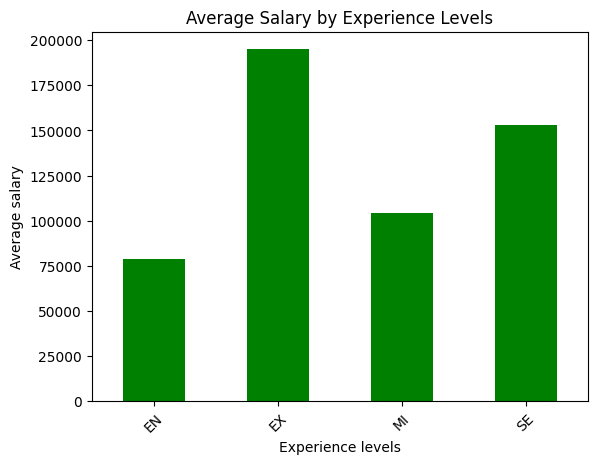

In [16]:
# answer for question 3
salary_per_exp = df.groupby(['experience_level'])['salary_in_usd'].mean()
salary_per_exp.plot(kind='bar',color='green')

plt.title('Average Salary by Experience Levels')
plt.xlabel('Experience levels')
plt.ylabel('Average salary')
plt.xticks(rotation=45)
plt.show()

<p>Experienced workers have higher salary than seniors.</p>

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [17]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year','job_title', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,job_title,experience_level_encoded
0,2023,Applied Scientist,0
1,2023,Applied Scientist,0
2,2023,Data Quality Analyst,0
3,2023,Compliance Data Analyst,0
4,2023,Applied Scientist,0


## 📈 Part 4: Train a Linear Regression Model

In [5]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [6]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

### Answers for reflection
#### Answer for #1:<br>
To assess the prediction of the model, I did a research about the R2 and RMSE first. The result of R2 on this data is 0.15 or 15% with 1 being the perfect prediction. But some article said that low R2 doesn't mean that the prediction is bad and you'll rarely see a model with an R2 of 1.

The data also have an RMSE score of 59164.82, a high-value but is not surprising given that we have an R2 of 0.15.
From what i read, the lower the RMSE score, the perfect the prediction.

I also analyzed the previous salaries from each grade and the difference is not too big, a realistic increase for each experience levels. But we should also consider underlying factors that the model would not be able to touch, like bonuses, regional wages, and economic issues.

Thus, I could say that the prediction is reasonable given that we have a low R2 and high RMSE. 

In [21]:
# previous salary per experience levels from 2020 to 2023
df.groupby(['work_year','experience_level'])['salary_in_usd'].mean().unstack()

experience_level,EN,EX,MI,SE
work_year,,,,
2020,57511.608696,139944.333333,87564.718750,137240.500000
2021,54905.254545,186128.000000,82116.934783,126085.356164
2022,77006.024194,188260.292683,101305.598338,147694.320175
2023,95283.966102,203705.683333,116199.521605,159568.928516


#### Answer for #2
By only using two features for our model, the result may not be as accurate. Ideally, the more independent variables we have, the better accuracy we will get. As our data can be affected by more than one factor, like economic crises, regional wages, and yearly bonuses.

### Answer for #3
To improve this model, we could add more features like regional wages and so on. We could also explore different models and approaches and see which one produces better and realistic result. Implementing cross-validation could be an option for more accurate results. 

### Answer for #4
From my research, R2 score doesn't clearly define the quality of the prediction. An article said that there is a scenario that a lower R2 score can be better than higher R2 score. They looked at the quality of the scatter plot on each data. Lower R2 score's plot is more cleaner and less outlier, While the one with high R2 score's plot is have multiple outliers within the data. It's regression line consistently under and over-predicts the data along the curve which means there is a bias. 

From the same article, it mentioned:<br>
> You cannot use R-squared to determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.<br>
> R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value!"

In conclusion, R2 is not enough to trust the prediction, and always consider using other means to check the quality of the prediction

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀